<a href="https://colab.research.google.com/github/k4404c/owl-wildfire/blob/main/notebooks/datacollection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/data/data_collection_2.csv'

import pandas as pd
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,Papa ID,Device ID,Event Type,Date,Message ID,Payload,# of Hops
0,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:14:23.484+00:00,B8SX,Counter:762 Temp:34.68 Hum:6.831 Press:97072.6...,1
1,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:14:12.837+00:00,BBJ6,Counter:761 Temp:34.72 Hum:6.748 Press:97073.1...,1
2,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:14:02.496+00:00,A7ZK,Counter:760 Temp:34.73 Hum:6.758 Press:97073.8...,1
3,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:13:52.111+00:00,PIP9,Counter:759 Temp:34.73 Hum:6.772 Press:97073.3...,1
4,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:13:41.733+00:00,48JF,Counter:758 Temp:34.74 Hum:6.781 Press:97073.8...,1


In [2]:
pattern = r'Counter:(?P<Counter>\d+)? Temp:(?P<Temp>[\d.]+) Hum:(?P<Hum>[\d.]+) Press:(?P<Press>[\d.]+) Gas:(?P<Gas>[\d.]+) Pred:(?P<Pred>\d+) Lat:(?P<Lat>[\d.]+) Lng:(?P<Lng>[-\d.]+) Alt:(?P<Alt>[\d.]+)'

# Apply the regex to extract the values into new columns
df_extracted = df['Payload'].str.extract(pattern)

# Convert numeric columns to appropriate types
# Use nullable integer type for Counter to handle missing values
df_extracted['Counter'] = pd.to_numeric(df_extracted['Counter'], errors='coerce').astype(pd.Int64Dtype())
df_extracted[['Temp', 'Hum', 'Press', 'Gas', 'Lat', 'Lng', 'Alt']] = df_extracted[['Temp', 'Hum', 'Press', 'Gas', 'Lat', 'Lng', 'Alt']].astype(float)
df_extracted['Pred'] = pd.to_numeric(df_extracted['Pred'], errors='coerce').astype(pd.Int64Dtype())

# Concatenate the original DataFrame with the extracted columns
df = pd.concat([df, df_extracted], axis=1)

# Drop the original 'payload' column if no longer needed
# df = df.drop(columns=['payload'])

df.head()

,Papa ID,Device ID,Event Type,Date,Message ID,Payload,# of Hops,Counter,Temp,Hum,Press,Gas,Pred,Lat,Lng,Alt
0,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:14:23.484+00:00,B8SX,Counter:762 Temp:34.68 Hum:6.831 Press:97072.6...,1,762,34.68,6.831,97072.62,82500.80,1,33.41656,-111.8202,381.0
1,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:14:12.837+00:00,BBJ6,Counter:761 Temp:34.72 Hum:6.748 Press:97073.1...,1,761,34.72,6.748,97073.11,82500.80,1,33.41656,-111.8202,381.0
2,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:14:02.496+00:00,A7ZK,Counter:760 Temp:34.73 Hum:6.758 Press:97073.8...,1,760,34.73,6.758,97073.88,82740.79,1,33.41656,-111.8202,381.0
3,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:13:52.111+00:00,PIP9,Counter:759 Temp:34.73 Hum:6.772 Press:97073.3...,1,759,34.73,6.772,97073.33,82660.64,1,33.41656,-111.8202,381.0
4,ASUPAPA2,ASUMAMA1,gps,2025-02-27T21:13:41.733+00:00,48JF,Counter:758 Temp:34.74 Hum:6.781 Press:97073.8...,1,758,34.74,6.781,97073.80,82341.59,1,33.41656,-111.8202,381.0


In [3]:
df_readings = df[['Device ID', 'Date', 'Temp',	'Hum',	'Press',	'Gas']]#,	'Lat',	'Lng',	'Alt' ]]
df_readings.head()

,Device ID,Date,Temp,Hum,Press,Gas
0,ASUMAMA1,2025-02-27T21:14:23.484+00:00,34.68,6.831,97072.62,82500.80
1,ASUMAMA1,2025-02-27T21:14:12.837+00:00,34.72,6.748,97073.11,82500.80
2,ASUMAMA1,2025-02-27T21:14:02.496+00:00,34.73,6.758,97073.88,82740.79
3,ASUMAMA1,2025-02-27T21:13:52.111+00:00,34.73,6.772,97073.33,82660.64
4,ASUMAMA1,2025-02-27T21:13:41.733+00:00,34.74,6.781,97073.80,82341.59


In [4]:
df['Device ID'].unique()

array(['ASUMAMA1', 'ASUMAMA2', '���MAMA1', '���iAMA2', '\x1a7B�AMA2',
       'B�(:AMA2', 'ϥ�MAMA2', '384.10A1'], dtype=object)

In [5]:
df.value_counts('Device ID')

,count
Device ID,
ASUMAMA1,690
ASUMAMA2,475
384.10A1,1
7B�AMA2,1
B�(:AMA2,1
ϥ�MAMA2,1
���MAMA1,1
���iAMA2,1


In [6]:
import numpy as np

df_readings['fire'] = np.where(df['Device ID'].str.endswith('A1'), 1, 0)
df_readings.head()

<ipython-input-6-f288811aae03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_readings['fire'] = np.where(df['Device ID'].str.endswith('A1'), 1, 0)


,Device ID,Date,Temp,Hum,Press,Gas,fire
0,ASUMAMA1,2025-02-27T21:14:23.484+00:00,34.68,6.831,97072.62,82500.80,1
1,ASUMAMA1,2025-02-27T21:14:12.837+00:00,34.72,6.748,97073.11,82500.80,1
2,ASUMAMA1,2025-02-27T21:14:02.496+00:00,34.73,6.758,97073.88,82740.79,1
3,ASUMAMA1,2025-02-27T21:13:52.111+00:00,34.73,6.772,97073.33,82660.64,1
4,ASUMAMA1,2025-02-27T21:13:41.733+00:00,34.74,6.781,97073.80,82341.59,1


In [7]:
df_readings['Date'] = pd.to_datetime(df_readings['Date'])

<ipython-input-7-a0077431ef2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_readings['Date'] = pd.to_datetime(df_readings['Date'])


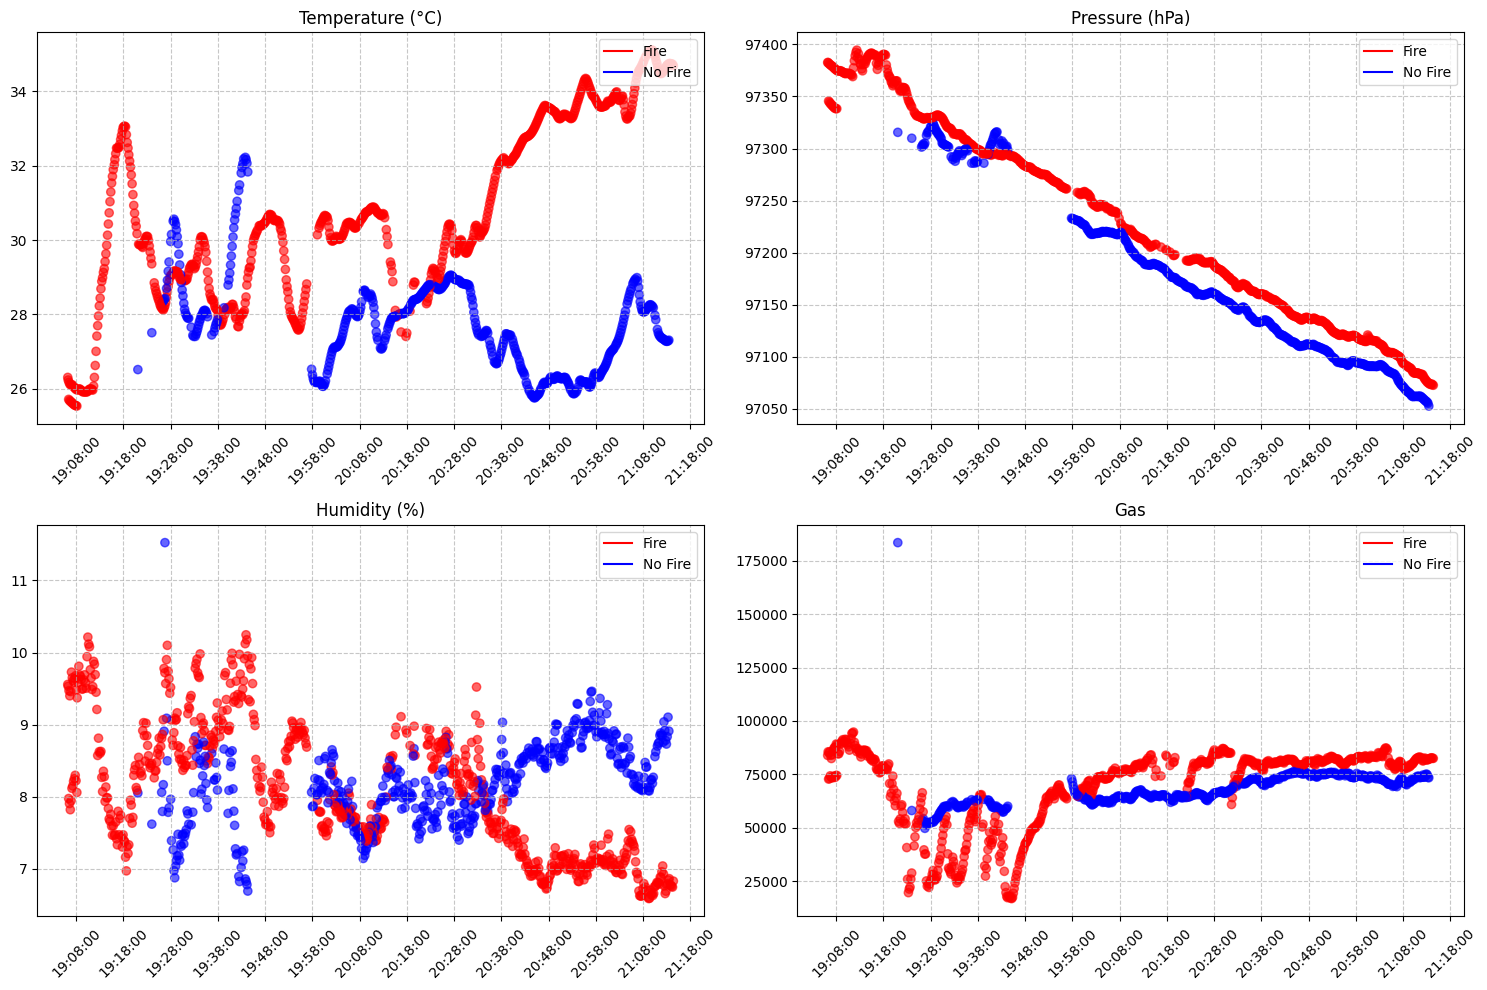

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.lines as mlines  # To create custom legend handles

# Create a figure and a 2x2 grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Format timestamps and create plots
measurements = {
    'Temperature (°C)': 'Temp',
    'Pressure (hPa)': 'Press',
    'Humidity (%)': 'Hum',
    'Gas': 'Gas',
}

axes = [ax1, ax2, ax3, ax4]

# Define custom legend handles
fire_handle = mlines.Line2D([], [], color='red', label='Fire')
no_fire_handle = mlines.Line2D([], [], color='blue', label='No Fire')

for ax, (title, measurement) in zip(axes, measurements.items()):
    colors = np.where(df_readings['fire'] == 1, 'red', 'blue')  # Red if fire, else blue
    ax.scatter(df_readings['Date'], df_readings[measurement], alpha=0.6, c=colors)
    ax.set_title(title)

    # Format x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add the legend to the subplot
    ax.legend(handles=[fire_handle, no_fire_handle], loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
#lets add volatility and velocity to df

df_readings = df_readings.sort_values(by='Date')
df_readings.set_index('Date', inplace=True)

# Define a rolling window (adjust based on data granularity)
rolling_window = '1min'  # You can adjust this

# Compute volatility (rolling standard deviation)
for col in ['Temp', 'Hum', 'Press', 'Gas']:
    df_readings[f'{col}_volatility'] = df_readings[col].rolling(rolling_window).std()

# Compute velocity (rate of change over time)
for col in ['Temp', 'Hum', 'Press', 'Gas']:
    df_readings[f'{col}_velocity'] = df_readings[col].diff() / df_readings.index.to_series().diff().dt.total_seconds()

# Fill NaN values resulting from diff() and rolling std()
df_readings = df_readings.fillna(0)

df_readings.head()

,Device ID,Temp,Hum,Press,Gas,fire,Temp_volatility,Hum_volatility,Press_volatility,Gas_volatility,Temp_velocity,Hum_velocity,Press_velocity,Gas_velocity
Date,,,,,,,,,,,,,,
2025-02-27 19:06:12.589000+00:00,384.10A1,26.31,9.558,97382.59,83879.42,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-02-27 19:06:18.053000+00:00,ASUMAMA1,26.24,9.533,97382.52,85561.50,1,0.049497,0.017678,0.049497,1189.410174,-0.012811,-0.004575,-0.012811,307.847731
2025-02-27 19:06:24.150000+00:00,ASUMAMA1,25.72,7.976,97345.55,72789.31,1,0.322335,0.906237,21.364875,6939.605781,-0.085288,-0.255371,-6.063638,-2094.831885
2025-02-27 19:06:28.509000+00:00,ASUMAMA1,26.18,9.471,97381.61,85049.84,1,0.267005,0.773199,18.350430,6061.497650,0.105529,0.342969,8.272540,2812.693278
2025-02-27 19:06:34.509000+00:00,ASUMAMA1,25.69,7.906,97344.54,73038.52,1,0.298613,0.866152,20.379337,6555.856541,-0.081667,-0.260833,-6.178333,-2001.886667


In [10]:
#Standardize attributes
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
df_readings[['Temp', 'Hum', 'Press', 'Gas']] = scaler.fit_transform(df_readings[['Temp', 'Hum', 'Press', 'Gas']])

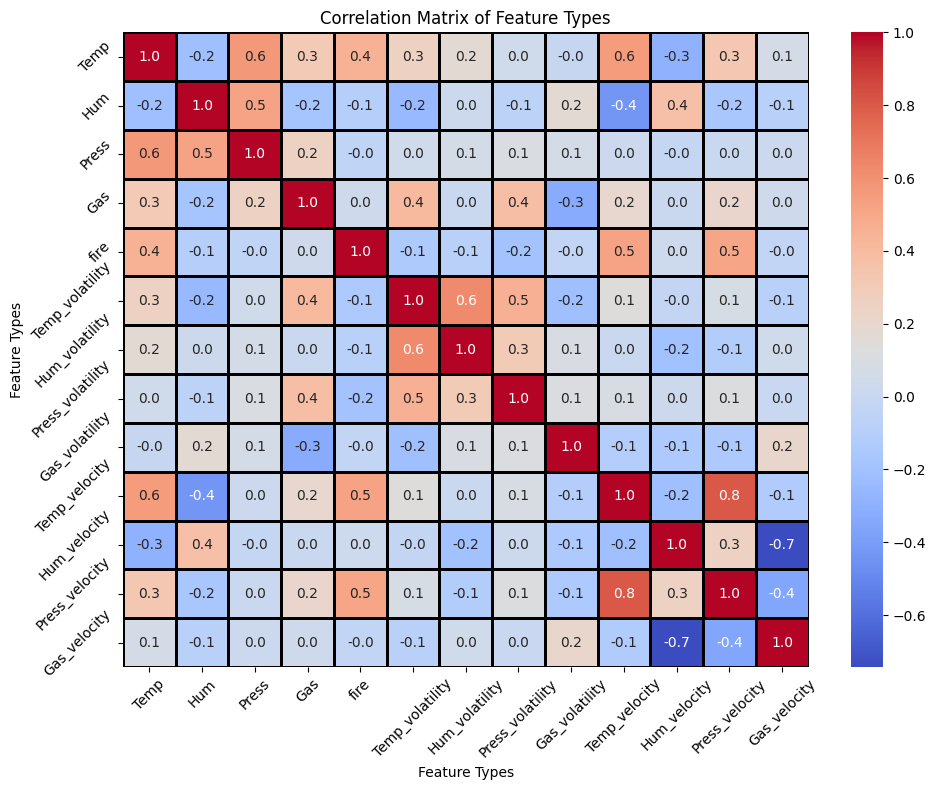

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df_readings.drop(['Device ID'], axis=1)

# Correlation matrix
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', linewidths=2, linecolor='black')
plt.title('Correlation Matrix of Feature Types')
plt.xlabel('Feature Types')
plt.ylabel('Feature Types')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-729cce195a25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fire_alarm_corr.index, y=fire_alarm_corr.values, palette='coolwarm')


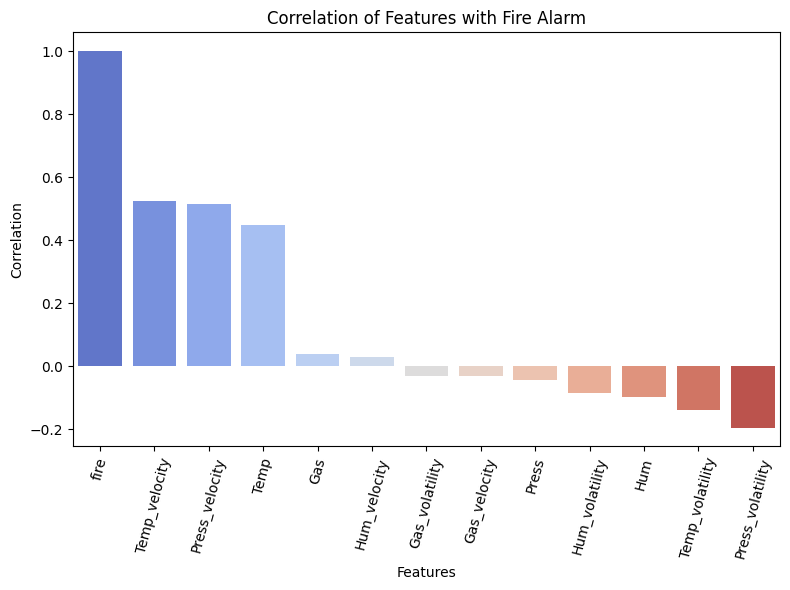

fire                1.000000
Temp_velocity       0.523108
Press_velocity      0.515236
Temp                0.449204
Gas                 0.038722
Hum_velocity        0.028367
Gas_volatility     -0.031160
Gas_velocity       -0.031782
Press              -0.043257
Hum_volatility     -0.084883
Hum                -0.096312
Temp_volatility    -0.139891
Press_volatility   -0.194961
Name: fire, dtype: float64


In [12]:
# Correlation of each feature with 'Fire Alarm'
fire_alarm_corr = corr_matrix['fire'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=fire_alarm_corr.index, y=fire_alarm_corr.values, palette='coolwarm')
plt.title('Correlation of Features with Fire Alarm')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# Alternatively, just print the correlations
print(fire_alarm_corr)

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Ensure the data is sorted by time (if not already sorted)
df_readings = df_readings.sort_values(by='Date')  # Ensure data is sorted chronologically

# Step 2: Split data into training and testing based on time (e.g., last 30% of the data as test)
train_size = int(0.7 * len(df_readings))  # Use 70% for training

# Create the training and testing datasets
train_data = df_readings[:train_size]
test_data = df_readings[train_size:]

# Step 3: Define features and target
features = ['Temp', 'Hum', 'Press', 'Gas',
            'Temp_volatility', 'Hum_volatility', 'Press_volatility', 'Gas_volatility',
            'Temp_velocity', 'Hum_velocity', 'Press_velocity', 'Gas_velocity']
target = 'fire'

# Step 4: Prepare the training and testing data
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Step 5: Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       185

    accuracy                           1.00       352
   macro avg       1.00      1.00      1.00       352
weighted avg       1.00      1.00      1.00       352



In [20]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report

# Initialize the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
X = df_readings[features]
y = df_readings[target]
# Loop through each fold
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print(f"Fold {train_index[-1]}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Fold 195:
Accuracy: 0.7794871794871795
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.84      0.68        55
           1       0.92      0.76      0.83       140

    accuracy                           0.78       195
   macro avg       0.75      0.80      0.76       195
weighted avg       0.82      0.78      0.79       195

Fold 390:
Accuracy: 0.18461538461538463
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.25      0.25       103
           1       0.11      0.11      0.11        92

    accuracy                           0.18       195
   macro avg       0.18      0.18      0.18       195
weighted avg       0.18      0.18      0.18       195

Fold 585:
Accuracy: 0.9384615384615385
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       102
           1       0.99      0.88      0.93    

In [22]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Ensure the data is sorted by time (if not already sorted)
df_readings = df_readings.sort_values(by='Date')  # Ensure data is sorted chronologically

# Step 2: Split data into training and testing based on time (e.g., last 30% of the data as test)
train_size = int(0.7 * len(df_readings))  # Use 70% for training

# Create the training and testing datasets
train_data = df_readings[:train_size]
test_data = df_readings[train_size:]

# Step 3: Define features and target
features = ['Temp', 'Hum', 'Press', 'Gas',
            'Temp_volatility', 'Hum_volatility', 'Press_volatility', 'Gas_volatility',
            'Temp_velocity', 'Hum_velocity', 'Press_velocity', 'Gas_velocity']
target = 'fire'

# Step 4: Prepare the training and testing data
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Step 5: Initialize XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=10, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 6: Fit the model
xgb_model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9545454545454546
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       167
           1       0.92      1.00      0.96       185

    accuracy                           0.95       352
   macro avg       0.96      0.95      0.95       352
weighted avg       0.96      0.95      0.95       352



In [15]:
!pip install tensorflow

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Feature and target columns
features = ['Temp', 'Hum', 'Press', 'Gas']
target = 'fire'

# Drop missing target values
df_readings = df_readings.dropna(subset=[target])

# Ensure the data is sorted by time (if not already sorted)
df_readings = df_readings.sort_values(by='Date')  # Assuming 'timestamp' column exists

# Normalize features using MinMax scaling
scaler = MinMaxScaler()
df_readings[features] = scaler.fit_transform(df_readings[features])

# Step 1: Manually split data into training and testing based on time (70% train, 30% test)
train_size = int(0.7 * len(df_readings))
train_data = df_readings[:train_size]
test_data = df_readings[train_size:]

# Step 2: Prepare X and y for training
X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# Step 3: Reshape data into 3D array [samples, time steps, features]
window_size = 20
X_train_seq = np.array([X_train[i-window_size:i] for i in range(window_size, len(X_train))])
y_train_seq = y_train[window_size:]
X_test_seq = np.array([X_test[i-window_size:i] for i in range(window_size, len(X_test))])
y_test_seq = y_test[window_size:]

# Step 4: Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, dropout=0.2), input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Bidirectional(LSTM(50, activation='relu', dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 6: Fit the model with class weights
class_weights = {0: 1, 1: len(y_train_seq) / sum(y_train_seq)}
model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping])

# Step 7: Make predictions
y_pred = (model.predict(X_test_seq) > 0.5).astype(int)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test_seq, y_pred))
print("Classification Report:\n", classification_report(y_test_seq, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.5915 - loss: 0.8981 - val_accuracy: 0.5125 - val_loss: 0.8464
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6364 - loss: 0.8069 - val_accuracy: 0.5125 - val_loss: 0.7493
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6347 - loss: 0.8175 - val_accuracy: 0.5125 - val_loss: 0.7918
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6294 - loss: 0.8168 - val_accuracy: 0.5125 - val_loss: 0.7913
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6711 - loss: 0.7741 - val_accuracy: 0.5125 - val_loss: 0.7413
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6445 - loss: 0.8097 - val_accuracy: 0.5125 - val_loss: 0.7910
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6392 - loss: 0.8110 - val_accuracy: 0.5125 - val_loss: 0.7684
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6530 - loss: 0.7891 - val_accuracy: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
